In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

# **Фильтрация датасета**

In [65]:
df = pd.read_excel('datasets/hourly_w-night_weather-dataset_chronological-order_w-night.xlsx') 
#hourly_w-night_weather-dataset_chronological-order_w-night.xlsx 
#weather-inputs_illinois_chronological-order.xlsx
df = df.iloc[1:, :]
# df = df.drop(labels='Random', axis=1)
df = df.drop(labels='(Inverter)', axis=1)
# df = df.drop(labels='Unnamed: 13', axis = 1)
df.head()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
1,2016-02-01,1,0.0000,7.8800,1.1600,0.6200,91.0400,7.0400,29.1100,29.9000,0.0000
2,2016-02-01,2,0.0000,9.8400,1.2200,0.9600,89.2800,8.9600,29.1200,29.9100,0.0000
3,2016-02-01,3,0.0000,9.8400,1.0200,0.6100,89.1200,6.3600,29.1400,29.9300,0.0000
4,2016-02-01,4,0.0000,9.8800,0.8300,0.4500,90.0800,6.1200,29.1500,29.9400,0.0000
5,2016-02-01,5,0.0000,9.8400,0.7700,0.1000,85.4400,5.0800,29.1600,29.9500,0.0000


In [66]:
df['Time'] = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis=1)
df = df.set_index('Time')

In [67]:
for i in range(len(df)):
    position = df.index[i]
    day = position.day
    month = position.month
    df.loc[position, 'Month'] = month
    df.loc[position, 'Day'] = day

In [68]:
df = df.reset_index('Time')

In [69]:
df.head()

,Time,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Month,Day
0,2016-02-01,1,0.0000,7.8800,1.1600,0.6200,91.0400,7.0400,29.1100,29.9000,0.0000,2.0000,1.0000
1,2016-02-01,2,0.0000,9.8400,1.2200,0.9600,89.2800,8.9600,29.1200,29.9100,0.0000,2.0000,1.0000
2,2016-02-01,3,0.0000,9.8400,1.0200,0.6100,89.1200,6.3600,29.1400,29.9300,0.0000,2.0000,1.0000
3,2016-02-01,4,0.0000,9.8800,0.8300,0.4500,90.0800,6.1200,29.1500,29.9400,0.0000,2.0000,1.0000
4,2016-02-01,5,0.0000,9.8400,0.7700,0.1000,85.4400,5.0800,29.1600,29.9500,0.0000,2.0000,1.0000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15071 entries, 0 to 15070
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               15071 non-null  datetime64[ns]
 1   Hour               15071 non-null  int64         
 2   Cloud coverage     15071 non-null  float64       
 3   Visibility         15071 non-null  float64       
 4   Temperature        15071 non-null  float64       
 5   Dew point          15071 non-null  float64       
 6   Relative humidity  15071 non-null  float64       
 7   Wind speed         15071 non-null  float64       
 8   Station pressure   15071 non-null  float64       
 9   Altimeter          15071 non-null  float64       
 10  Solar energy       15071 non-null  float64       
 11  Month              15071 non-null  float64       
 12  Day                15071 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5

In [71]:
df.describe()

,Time,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Month,Day
count,15071,15071.0000,15071.0000,15071.0000,15071.0000,15071.0000,15071.0000,15071.0000,15071.0000,15071.0000,15071.0000,15071.0000,15071.0000
mean,2016-12-14 08:45:19.288699904,12.4992,0.3813,9.1570,14.3796,9.7651,72.2561,8.6236,28.5820,30.0206,910.5164,6.2211,15.5570
min,2016-02-01 00:00:00,1.0000,0.0000,0.0000,-19.2300,-20.7800,14.8800,0.0000,7.6700,21.8800,0.0000,1.0000,1.0000
25%,2016-07-06 12:00:00,6.5000,0.0000,9.9600,6.9600,3.0800,59.8800,5.0400,29.1000,29.9100,0.0000,4.0000,8.0000
50%,2016-12-10 00:00:00,12.0000,0.1400,10.0000,15.8400,11.0000,76.7000,7.7200,29.2200,30.0300,35.5100,6.0000,15.0000
75%,2017-05-24 00:00:00,18.0000,0.9100,10.0000,22.3200,17.4100,88.6350,11.7600,29.3300,30.1300,1467.3750,9.0000,23.0000
max,2017-10-28 00:00:00,24.0000,1.0000,10.0000,34.0100,27.3100,100.0000,41.5600,29.9700,30.7800,4733.2500,12.0000,31.0000
std,NaN,6.9220,0.4240,2.0512,10.1465,9.5412,20.0333,5.5448,3.5208,0.2165,1375.1412,3.0621,8.7693


In [72]:
# Поиск дубликатов и NaN

print('Missing values - {}'
      .format(df.isnull().values.sum()))

temp_weather = df.duplicated(keep='first').sum()

print('Duplicate values - {}'
      .format(temp_weather))

Missing values - 0
Duplicate values - 0


In [73]:
# Функция для отрисовки данных

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Hour', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

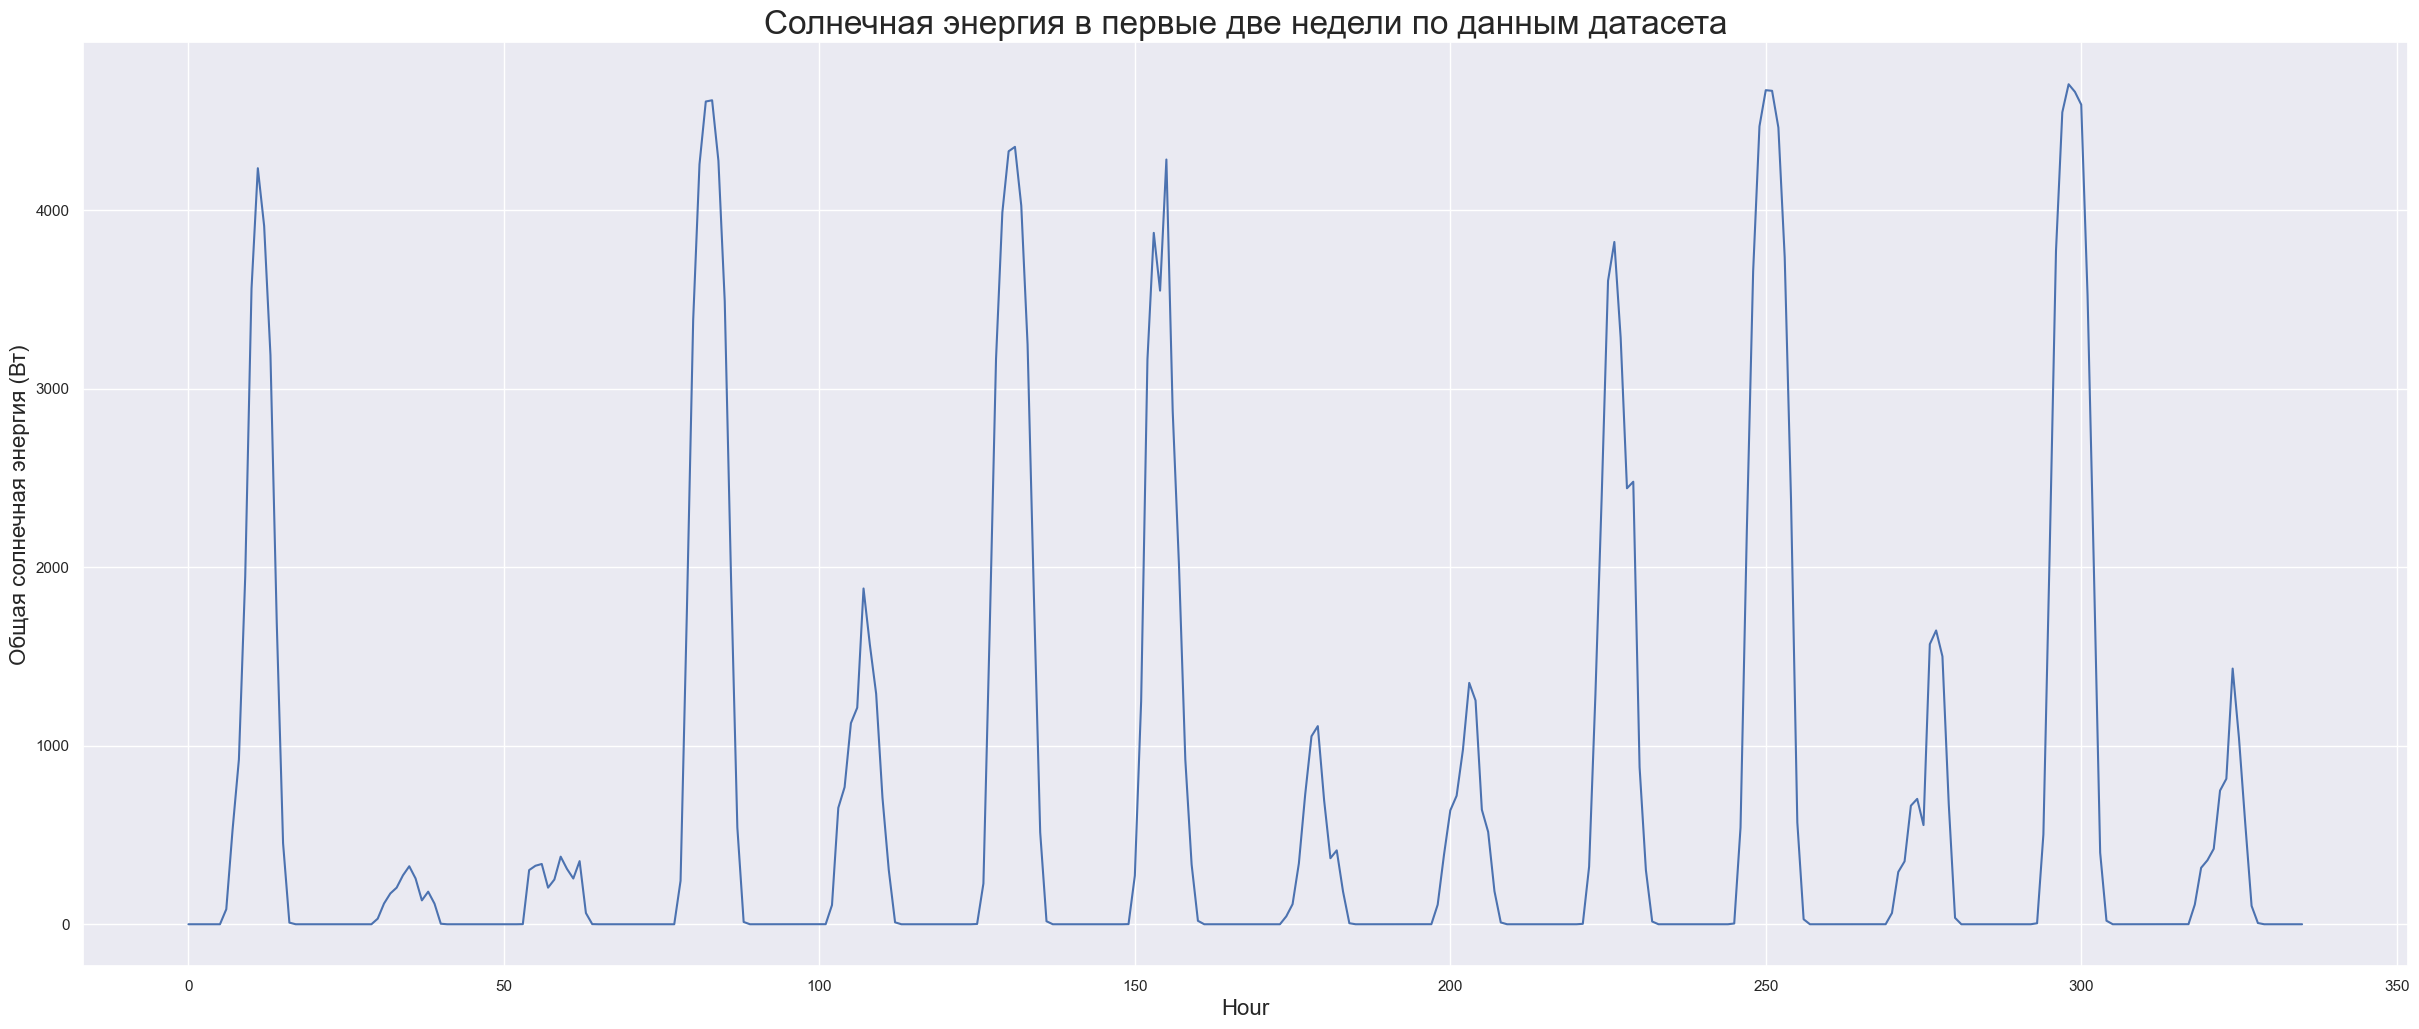

In [74]:
ax = plot_series(df=df, column='Solar energy', ylabel='Общая солнечная энергия (Вт)',
                 title='Солнечная энергия в первые две недели по данным датасета', end=24 * 7 * 2)
plt.savefig('files_ML/солнечная_энергия_2_недели.png')
plt.show()

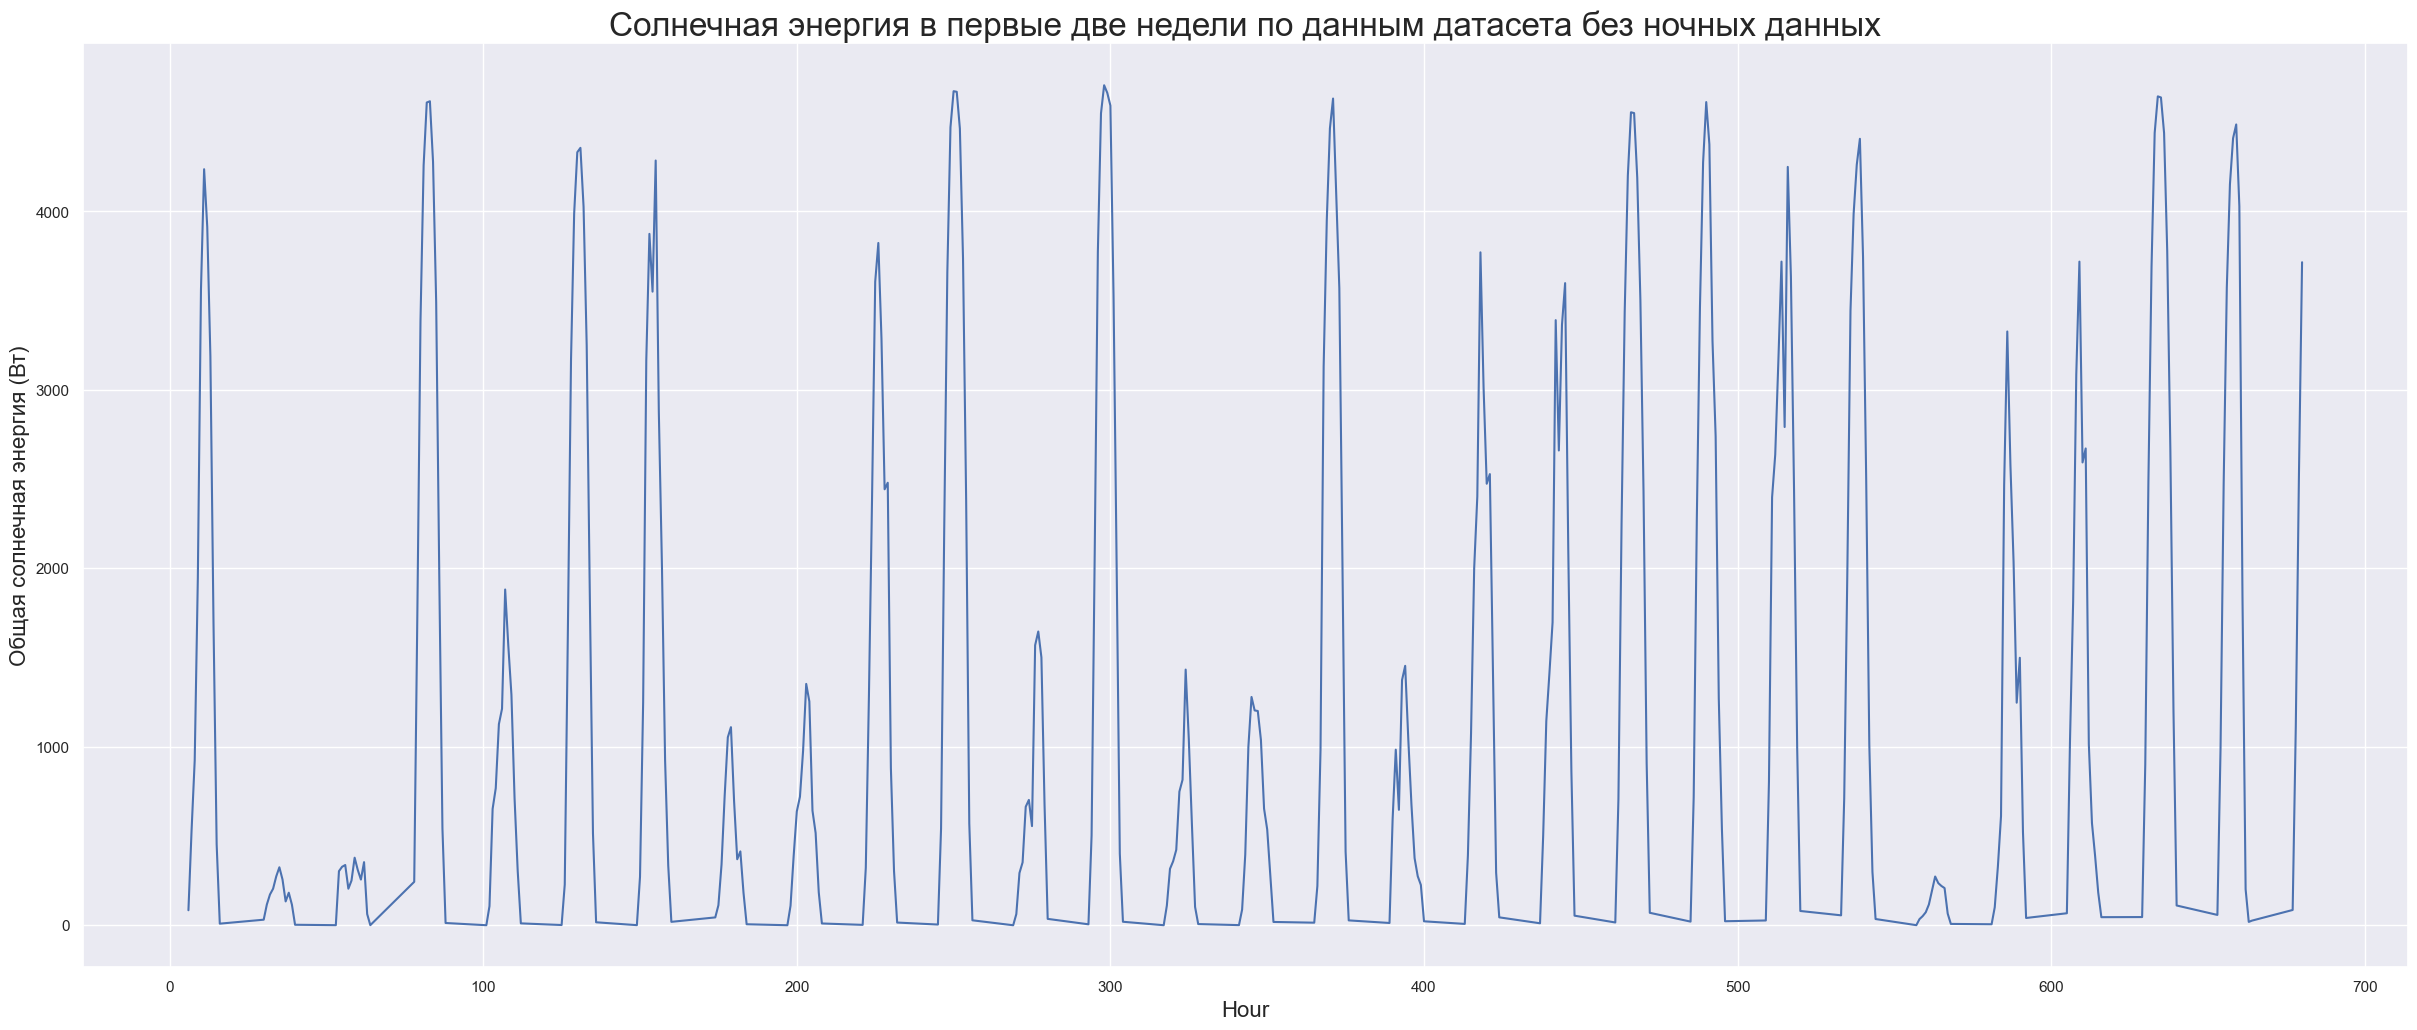

In [75]:
# Удалим ночные часы

df_night = df.drop(df[df['Solar energy'] <= 0].index)

ax = plot_series(df=df_night, column='Solar energy', ylabel='Общая солнечная энергия (Вт)',
                 title='Солнечная энергия в первые две недели по данным датасета без ночных данных', end=24 * 7 * 2)
plt.savefig('files_ML/солнечная_энергия_2_недели_без_ночи.png')
plt.show()


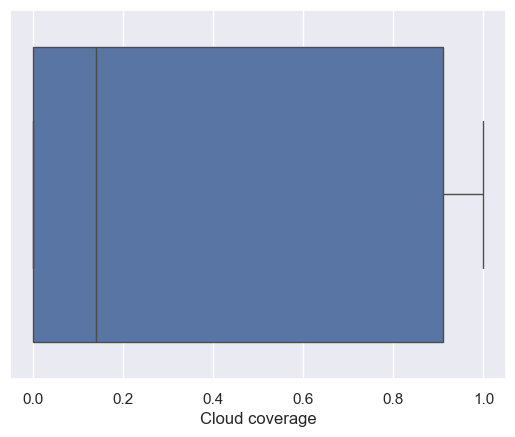

In [76]:
# Данные в колонке 'Облачность'

sns.boxplot(x=df['Cloud coverage'])
plt.savefig('files_ML/Облачность.png')
plt.show()

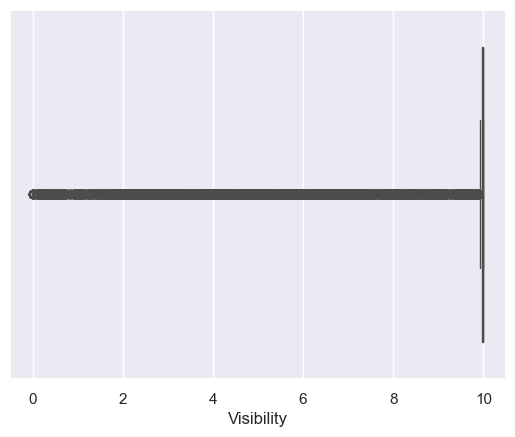

In [77]:
# Данные в колонке 'Видимость'

sns.boxplot(x=df['Visibility'])
plt.savefig('files_ML/Видимость.png')
plt.show()

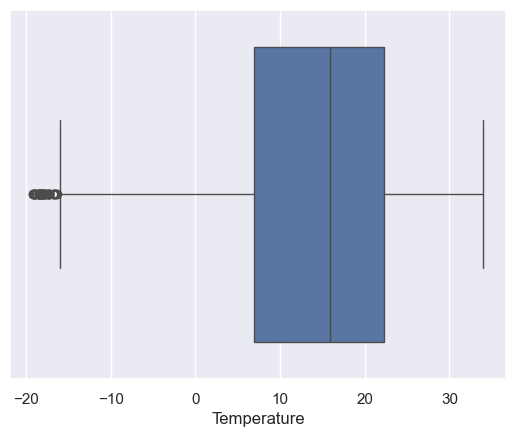

In [78]:
# Данные в колонке 'температура'

sns.boxplot(x=df['Temperature'])
plt.savefig('files_ML/Температура.png')
plt.show()

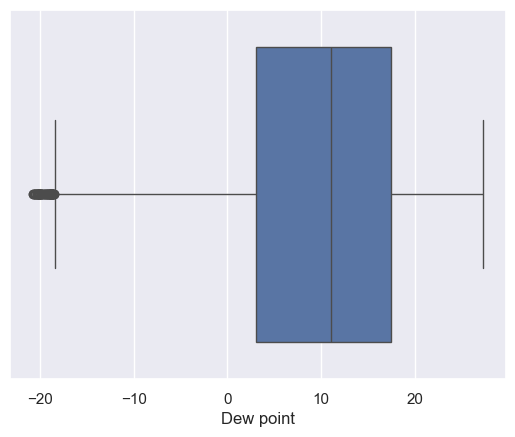

In [79]:
# Данные в колонке 'Точка росы'

sns.boxplot(x=df['Dew point'])
plt.savefig('files_ML/Точка_росы.png')
plt.show()

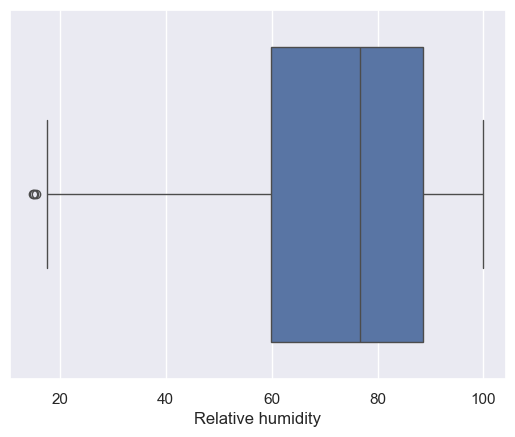

In [80]:
# Данные в колонке 'Относительная влажность'

sns.boxplot(x=df['Relative humidity'])
plt.savefig('files_ML/Относительная_влажность.png')
plt.show()

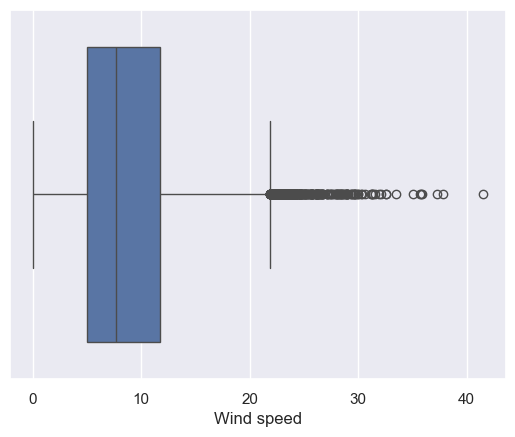

In [81]:
# Данные в колонке 'Скорость ветра'

sns.boxplot(x=df['Wind speed'])
plt.savefig('files_ML/Скорость_ветра.png')
plt.show()

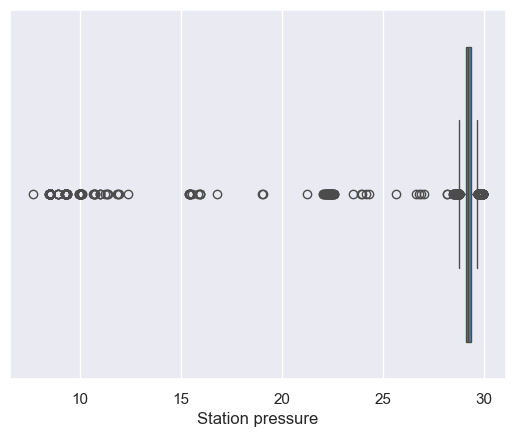

In [82]:
# Данные в колонке 'Атмосферное давление'

sns.boxplot(x=df['Station pressure'])
plt.savefig('files_ML/Атмосферное_давление.png')
plt.show()

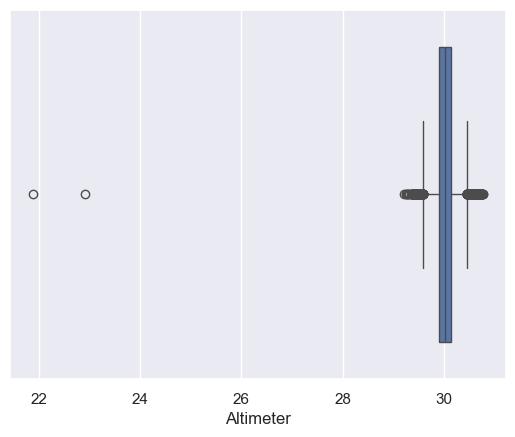

In [83]:
# Данные в колонке 'Высота'

sns.boxplot(x=df['Altimeter'])
plt.savefig('files_ML/Высота.png')
plt.show()

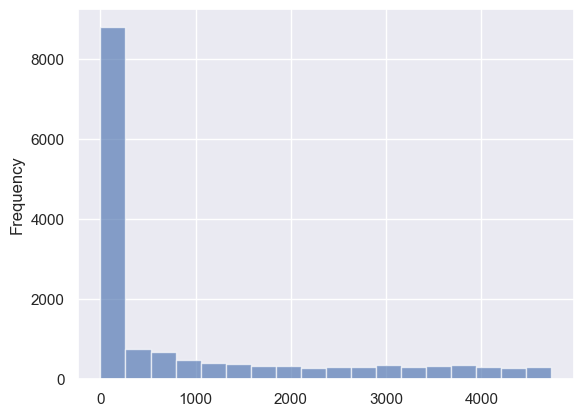

In [84]:
# Пострим гистограмму фактической солнечной энергии

ax = df['Solar energy'].plot.hist(bins=18, alpha=0.65)

In [85]:
y = df['Solar energy']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -11.383537
p-value: 0.000000
#Lags used: 43
Critical Value (1%): -3.430785
Critical Value (5%): -2.861732
Critical Value (10%): -2.566872


In [86]:
kpss_test = kpss(y, regression='c')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

KPSS Statistic: 1.409892
p-value: 0.010000
#Lags used: 27
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000


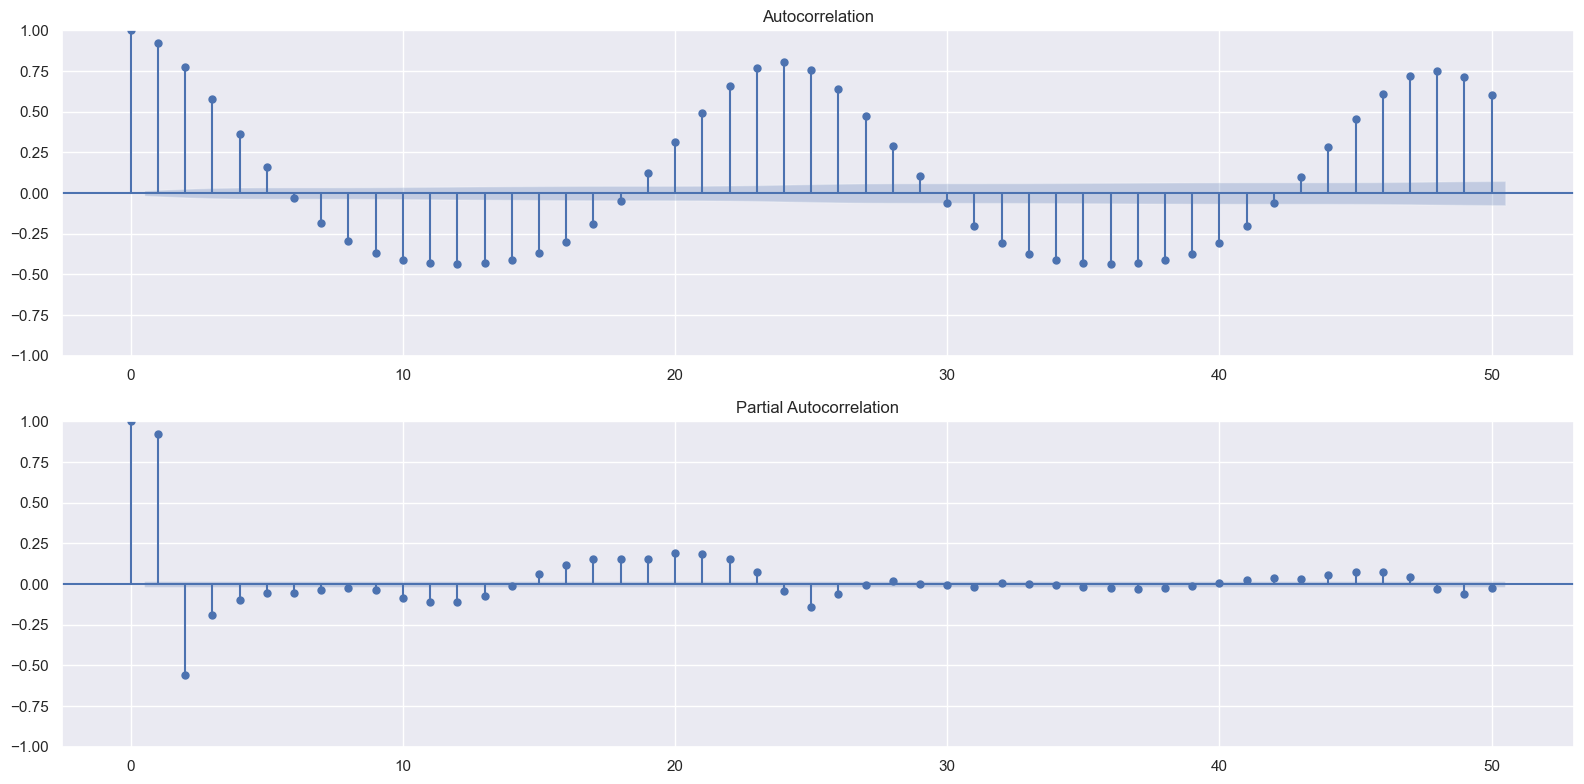

In [87]:
# Plot autocorrelation and partial autocorrelation plots

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 8))
plot_acf(df['Solar energy'], lags=50, ax=ax1)
plot_pacf(df['Solar energy'], lags=50, ax=ax2)
plt.tight_layout()
plt.savefig('files_ML/Корреляция.png')
plt.show()

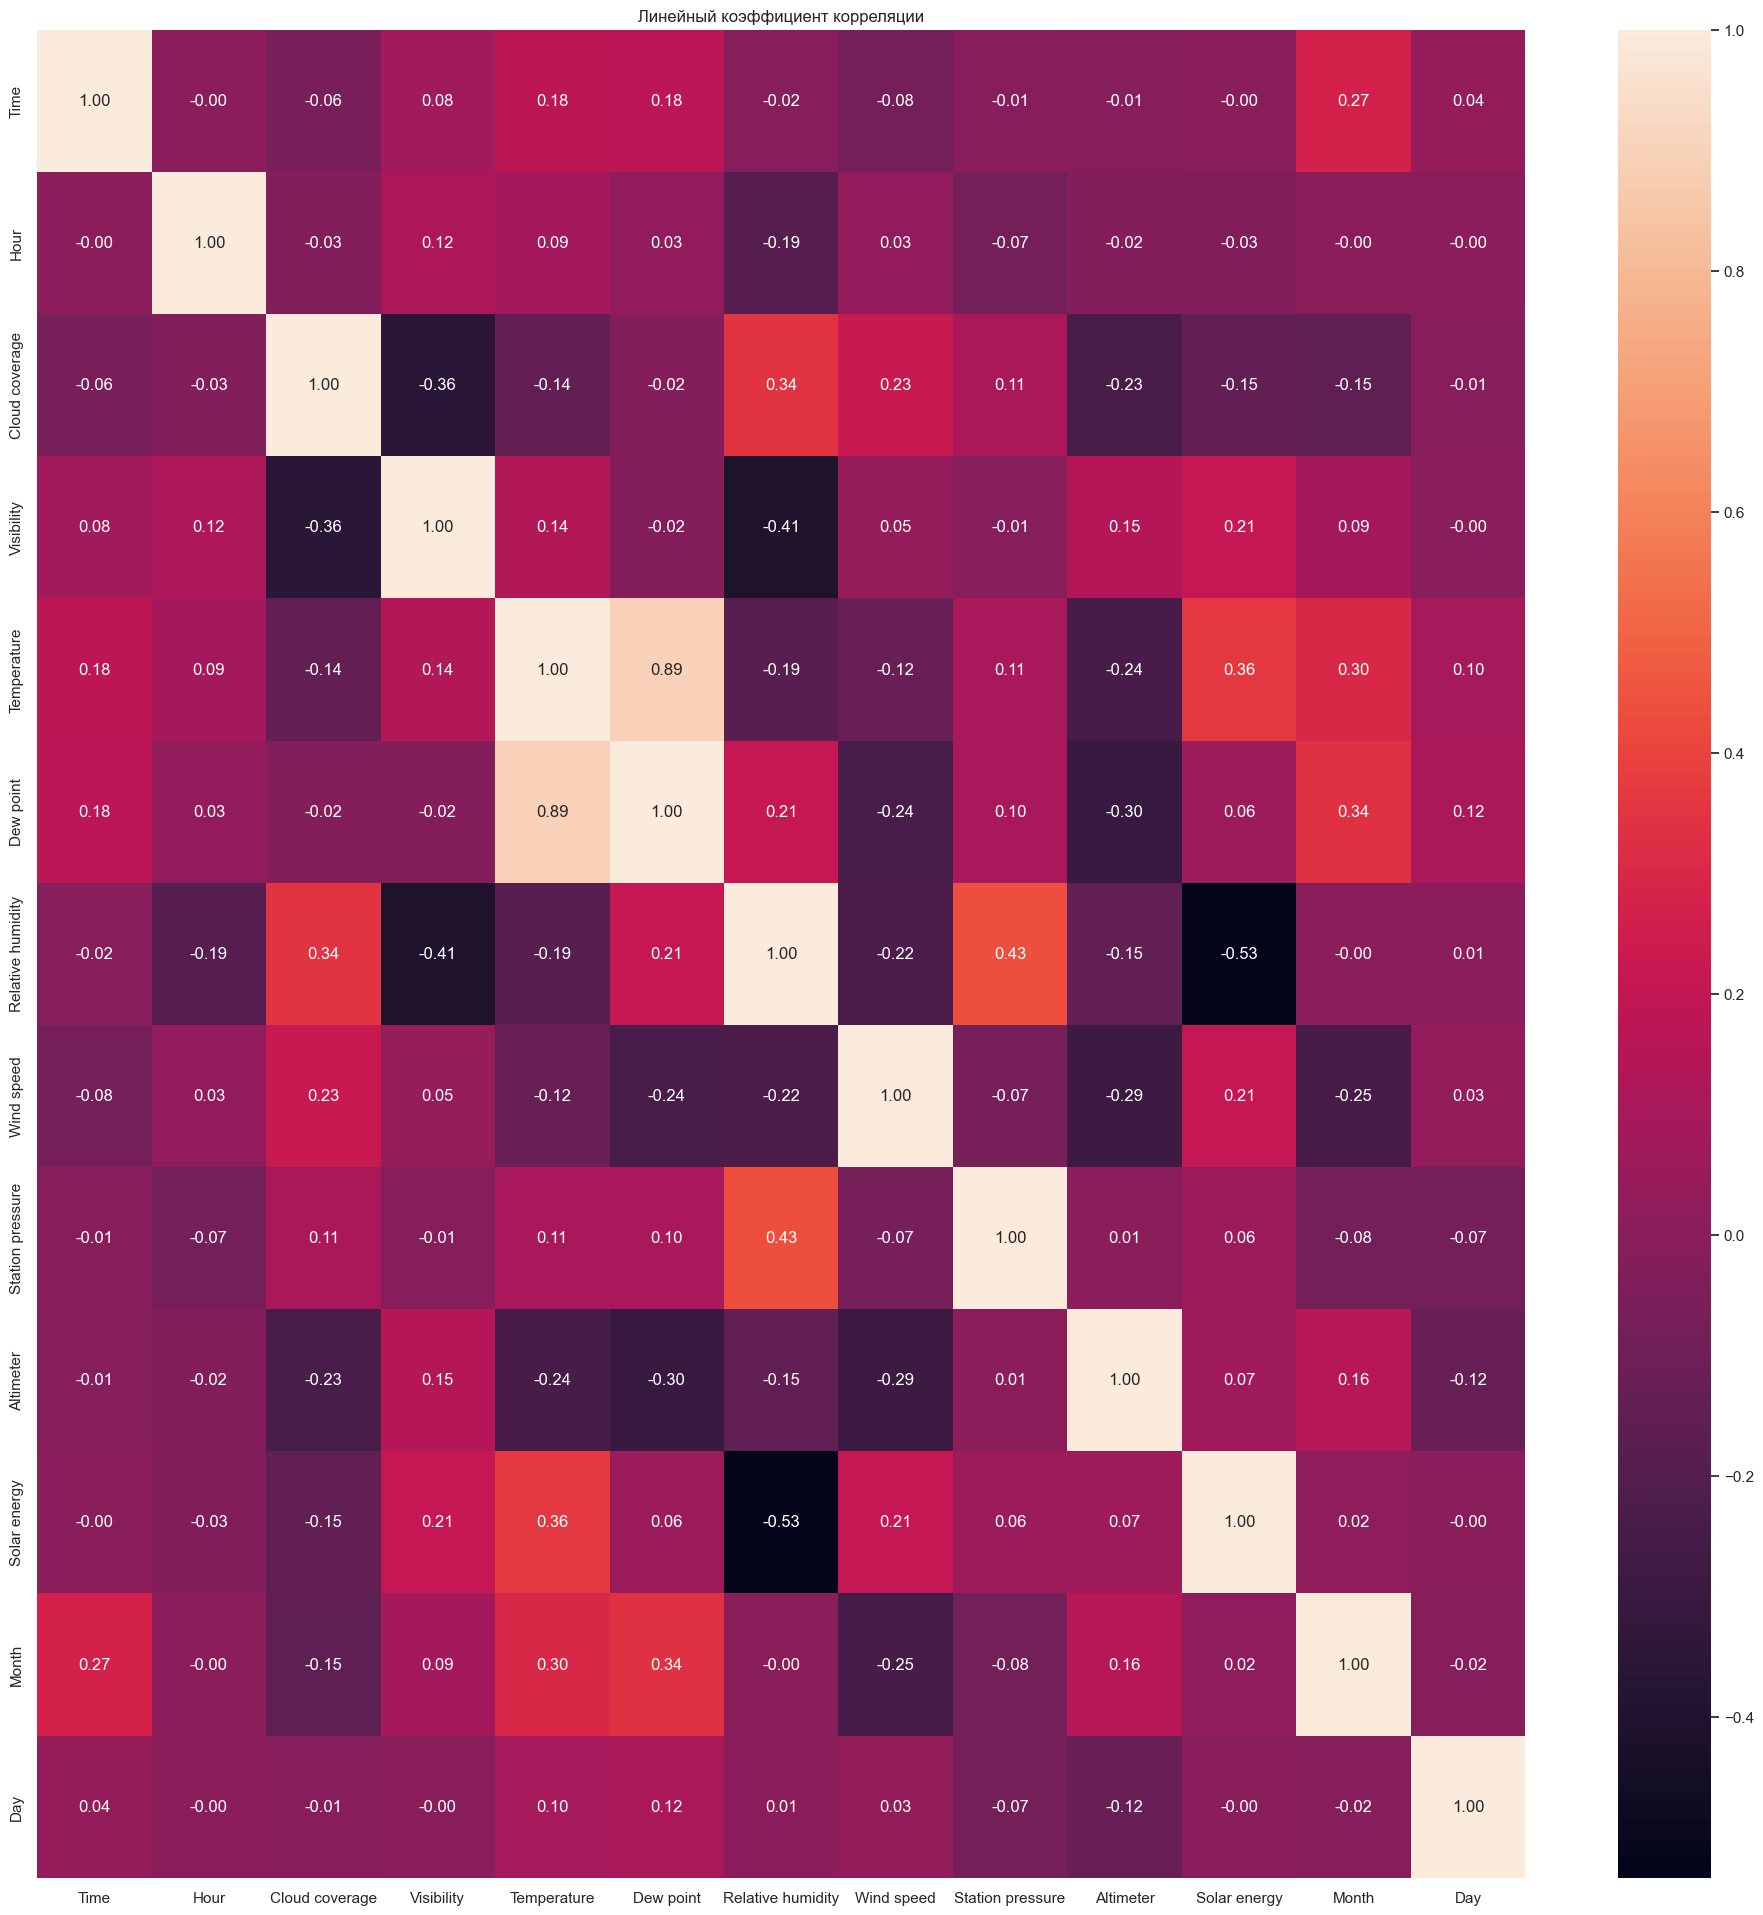

In [88]:
# Plot Pearson correlation matrix

correlations = df.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Линейный коэффициент корреляции')
plt.savefig('files_ML/Линейный_коэффициент_корреляции.png')
plt.show()

In [89]:
# Найдем корреляции между солнечной энергией и остальными данными

correlations = df.corr(method='pearson')
print(correlations['Solar energy'].sort_values(ascending=False).to_string())

Solar energy         1.0000
Temperature          0.3603
Visibility           0.2066
Wind speed           0.2063
Altimeter            0.0741
Dew point            0.0641
Station pressure     0.0610
Month                0.0179
Time                -0.0026
Day                 -0.0036
Hour                -0.0309
Cloud coverage      -0.1480
Relative humidity   -0.5333


# **Обучение и валидация**

In [90]:
df = df_night.reset_index()
df = df.drop(['Time'], axis=1)
df.head(5)


,index,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Month,Day
0,6,7,0.0000,10.0000,0.4700,-0.0400,90.0800,6.0000,29.2000,29.9900,84.2900,2.0000,1.0000
1,7,8,0.1400,9.9200,0.8900,0.3000,92.0000,2.7600,29.2200,30.0100,531.0000,2.0000,1.0000
2,8,9,0.9200,10.0000,1.9700,0.4100,86.1200,5.5600,29.2400,30.0400,923.7500,2.0000,1.0000
3,9,10,0.4600,10.0000,3.1500,1.0700,82.4800,2.1200,29.2700,30.0600,1947.7500,2.0000,1.0000
4,10,11,0.4200,10.0000,4.5000,1.0500,75.8800,0.0000,29.2700,30.0600,3562.0000,2.0000,1.0000


In [91]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df.head()

,index,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Month,Day
0,0.0000,0.1333,0.0000,1.0000,0.3665,0.4284,0.8835,0.1444,0.9641,0.9112,0.0178,0.0909,0.0000
1,0.0001,0.2000,0.1400,0.9920,0.3744,0.4355,0.9060,0.0664,0.9651,0.9135,0.1122,0.0909,0.0000
2,0.0001,0.2667,0.9200,1.0000,0.3948,0.4378,0.8369,0.1338,0.9660,0.9169,0.1952,0.0909,0.0000
3,0.0002,0.3333,0.4600,1.0000,0.4171,0.4516,0.7942,0.0510,0.9674,0.9191,0.4115,0.0909,0.0000
4,0.0003,0.4000,0.4200,1.0000,0.4426,0.4512,0.7166,0.0000,0.9674,0.9191,0.7525,0.0909,0.0000


In [92]:
features1 = ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter',
        'Month', 'Day']

features2 = ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter']

target = ['Solar energy']

In [93]:
X_s1 = norm_df[features1]
X_s2 = norm_df[features2]

y_s1 = norm_df[target]

In [94]:
l = len(norm_df)
train_end_idx = int(0.6*l)

X_train1 = X_s1.iloc[:train_end_idx, :]
X_train2 = X_s2.iloc[:train_end_idx, :]

y_train1 = y_s1.iloc[:train_end_idx, ]
y_train2 = y_s1.iloc[:train_end_idx, ]

X_test1 = X_s1.iloc[train_end_idx: , :]
X_test2 = X_s2.iloc[train_end_idx: , :]

y_test1 = y_s1.iloc[train_end_idx: , ]
y_test2 = y_s1.iloc[train_end_idx: , ]

In [95]:
X = df[df.columns.drop('Solar energy')].values
y = df['Solar energy'].values
y = y.reshape(-1, 1)

In [96]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [97]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

MinMaxScaler()

In [98]:
X_norm1 = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

In [99]:
pca = PCA()
X_pca = pca.fit(X_norm1[:train_end_idx])

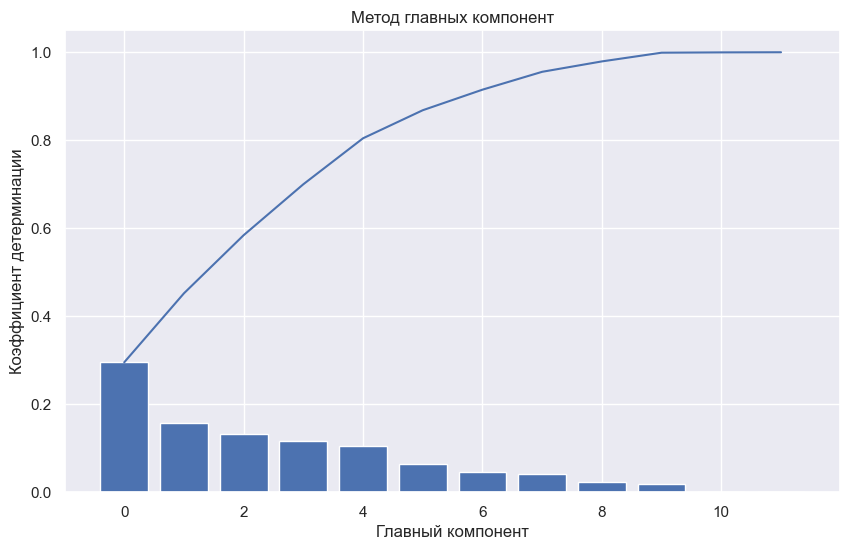

In [100]:
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Метод главных компонент')
plt.xlabel('Главный компонент')
plt.ylabel('Коэффициент детерминации')
plt.savefig('files_ML/PCA.png')
plt.show()

In [101]:
pca = PCA(n_components=0.90)
pca.fit(X_norm1[:train_end_idx])
X_pca = pca.transform(X_norm1)

In [102]:
X_pca.shape

(8424, 7)

In [103]:
X_train3 = X_pca[:train_end_idx, :]
y_train3 = y_norm[:train_end_idx, ]

X_test3 = X_pca[train_end_idx:, :]
y_test3 = y_norm[train_end_idx:, ]

# **Линейная регрессия**

In [104]:
pd.options.display.float_format = '{:.4f}'.format
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

import IPython.core.display as di

In [105]:
# Initialize and fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# R^2 (coefficient of determination) regression score function
# Mean squared error regression loss

benchmark_model1 = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model1.fit(X_train1, y_train1) #Fit object to training set
end = time()
y_pred1=benchmark_model1.predict(X_test1)
print("Classifier fitted in {:.4f} seconds".format(end-start))
print("Score on Training data : {:.4f}%".format(benchmark_model1.score(X_train1, y_train1) * 100))
print("Score on Testing data : {:.4f}%".format(benchmark_model1.score(X_test1, y_test1) * 100))

y_test1_np = np.array(y_test1)
print("RMSE : {:.4f}".format(np.sqrt(np.mean((y_test1_np - y_pred1)**2))))
mae = mean_absolute_error(y_test1, y_pred1)
print('MAE: %4f' % mae)

Classifier fitted in 0.0051 seconds
Score on Training data : 43.7715%
Score on Testing data : 43.6321%
RMSE : 0.2418
MAE: 0.200411


In [106]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    reg_props["MAE"] = mean_absolute_error(y_test, regressor.predict(X_test))
    
    return reg_props

In [107]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
        SVR
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train1, y_train1, X_test1, y_test1)
        props.append(properites)
        
    return props

In [108]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    mae_vals = [prop["MAE"] for prop in properties]
        
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training Times": train_times,
                            "Training Scores": train_scores,
                            "Testing Scores": test_scores,
                            "RMSE": rmse_vals,
                            "MAE":mae_vals,
                      }
                  )
    
    return df

# Obain the properties in a structured DataFrame after executing the pipeline
properties1 = get_properties()

In [109]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties1 = pd.concat(
    [properties1,
    pd.Series(
    {
        "Name": "Linear Regression",
        "RMSE": np.sqrt(mean_squared_error(y_test1, benchmark_model1.predict(X_test1))),
        "MAE": mean_absolute_error(y_test1, benchmark_model1.predict(X_test1)),
        #"MAPE": MAPError(y_test, benchmark_model.predict(X_test)),
        "Training Scores": benchmark_model1.score(X_train1, y_train1),
        "Testing Scores" :benchmark_model1.score(X_test1, y_test1),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties1

,Training Times,Training Scores,Testing Scores,RMSE,MAE
Ridge,0.0087,0.4365,0.4352,0.2421,0.2010
KNeighborsRegressor,0.0704,0.8839,0.6619,0.1873,0.1358
RandomForestRegressor,2.0552,0.9819,0.7643,0.1564,0.1017
GradientBoostingRegressor,0.6707,0.8525,0.7659,0.1559,0.1057
MLPRegressor,0.7588,0.8146,0.7316,0.1669,0.1201
ExtraTreesRegressor,0.8770,1.0000,0.7690,0.1548,0.1000
SVR,0.2471,0.8392,0.7503,0.1610,0.1145
Linear Regression,0.0051,0.4377,0.4363,0.2418,0.2004


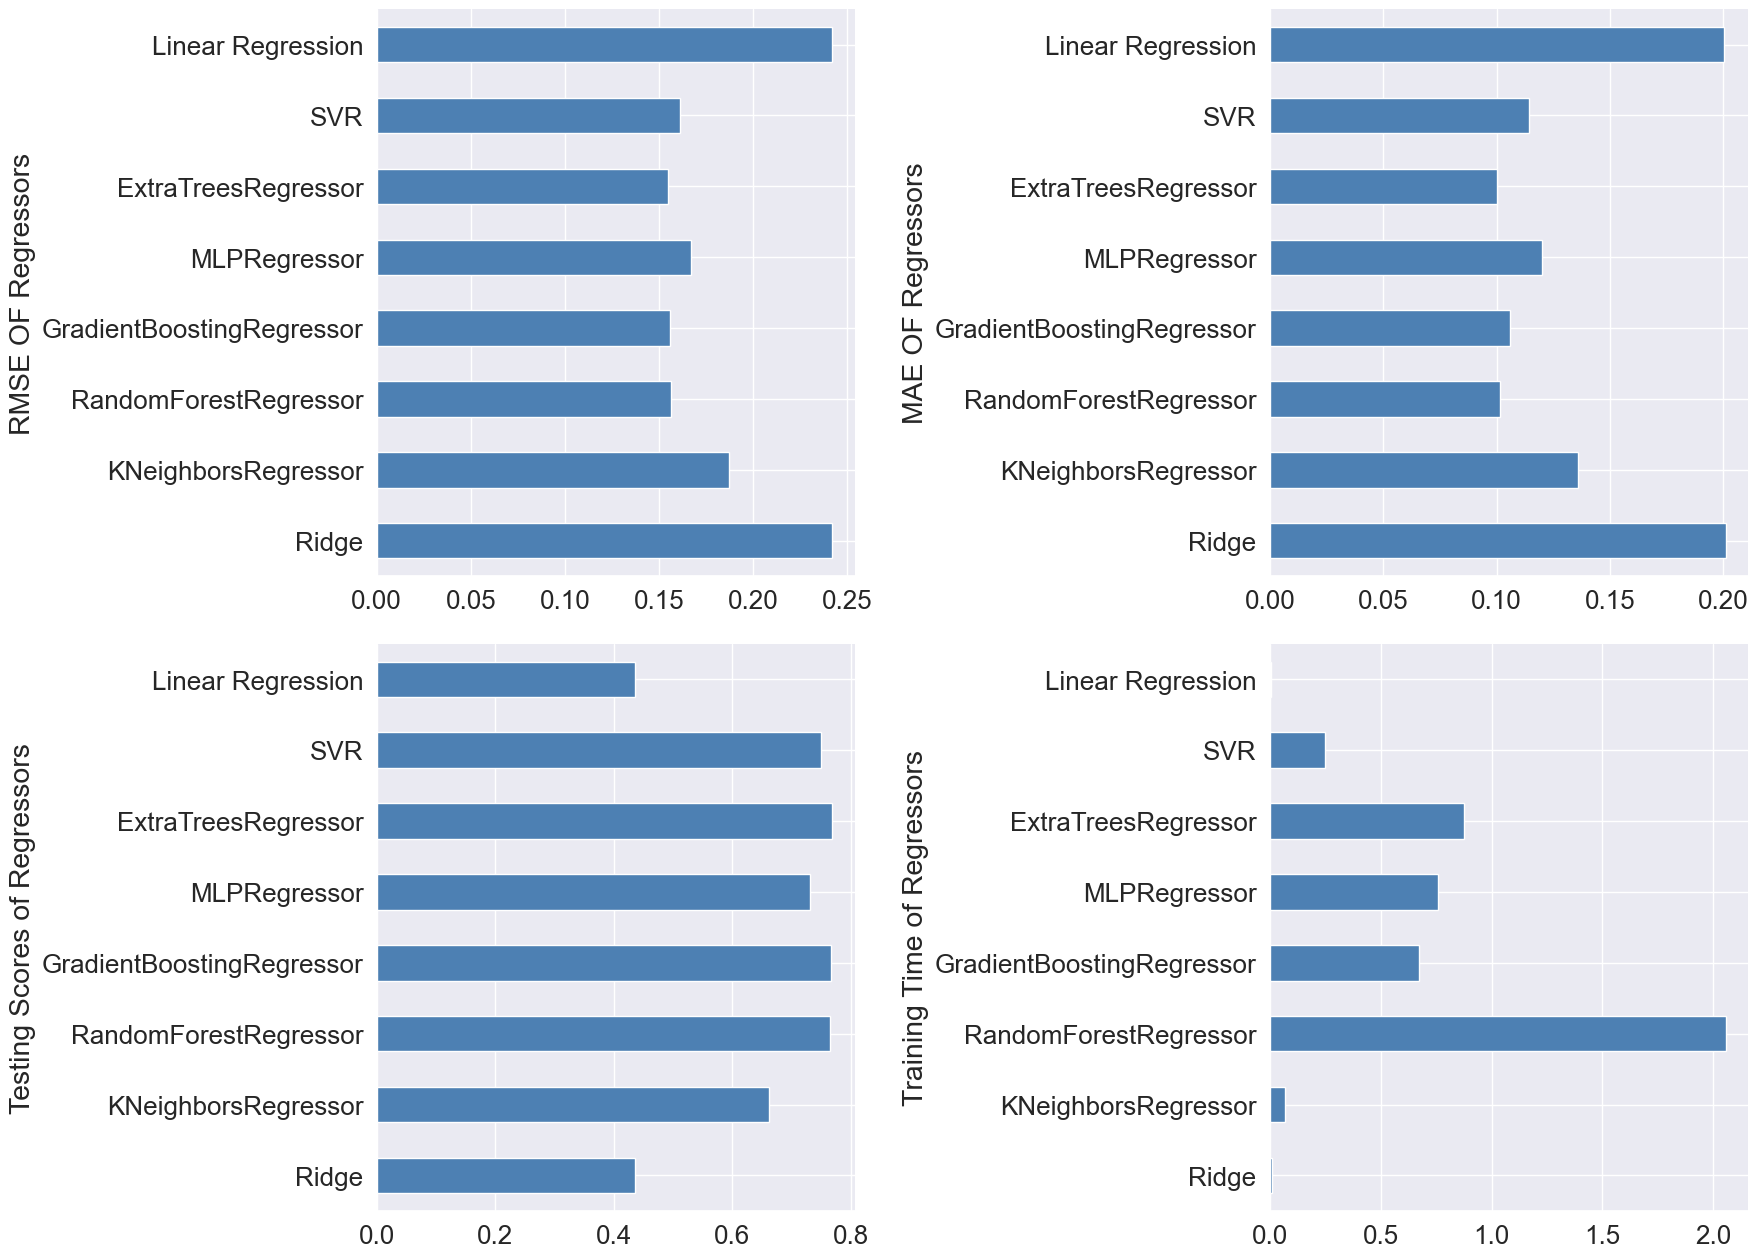

In [110]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties1["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties1["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("Testing Scores of Regressors")
properties1["Testing Scores"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties1["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.savefig('files_ML/S1.png')
plt.show()

# **Регрессия без учета даты и времени**

In [111]:
benchmark_model2 = LinearRegression() 

start = time()
benchmark_model2.fit(X_train2, y_train2) 
end = time()
y_pred2=benchmark_model2.predict(X_test2)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model2.score(X_train2, y_train2) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model2.score(X_test2, y_test2) * 100))

y_test2_np = np.array(y_test2)
print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test2_np - y_pred2)**2))))
mae = mean_absolute_error(y_test2, y_pred2)
print('MAE: %f' % mae)

Classifier fitted in 0.00 seconds
Score on Training data : 43.61%
Score on Testing data : 43.78%
RMSE : 0.242
MAE: 0.200128


In [112]:
def execute_pipeline():
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
        SVR
            ]

    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train2, y_train2, X_test2, y_test2)
        props.append(properites)
        
    return props

In [113]:
properties2 = get_properties()

properties2 = pd.concat(
    [properties2,
    pd.Series(
    {
        "Name": "Linear Regression",
        "RMSE": np.sqrt(mean_squared_error(y_test2, benchmark_model2.predict(X_test2))),
        "MAE": mean_absolute_error(y_test2, benchmark_model2.predict(X_test2)),
        "Training Scores": benchmark_model2.score(X_train2, y_train2),
        "Testing Scores" :benchmark_model2.score(X_test2, y_test2),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties2

,Training Times,Training Scores,Testing Scores,RMSE,MAE
Ridge,0.0039,0.4350,0.4362,0.2419,0.2007
KNeighborsRegressor,0.0038,0.8768,0.7045,0.1751,0.1224
RandomForestRegressor,1.7768,0.9774,0.7546,0.1596,0.1074
GradientBoostingRegressor,0.6070,0.8365,0.7605,0.1577,0.1087
MLPRegressor,0.8983,0.7835,0.7342,0.1661,0.1262
ExtraTreesRegressor,0.7922,1.0000,0.7599,0.1578,0.1066
SVR,0.2128,0.8109,0.7476,0.1618,0.1169
Linear Regression,0.0019,0.4361,0.4378,0.2415,0.2001


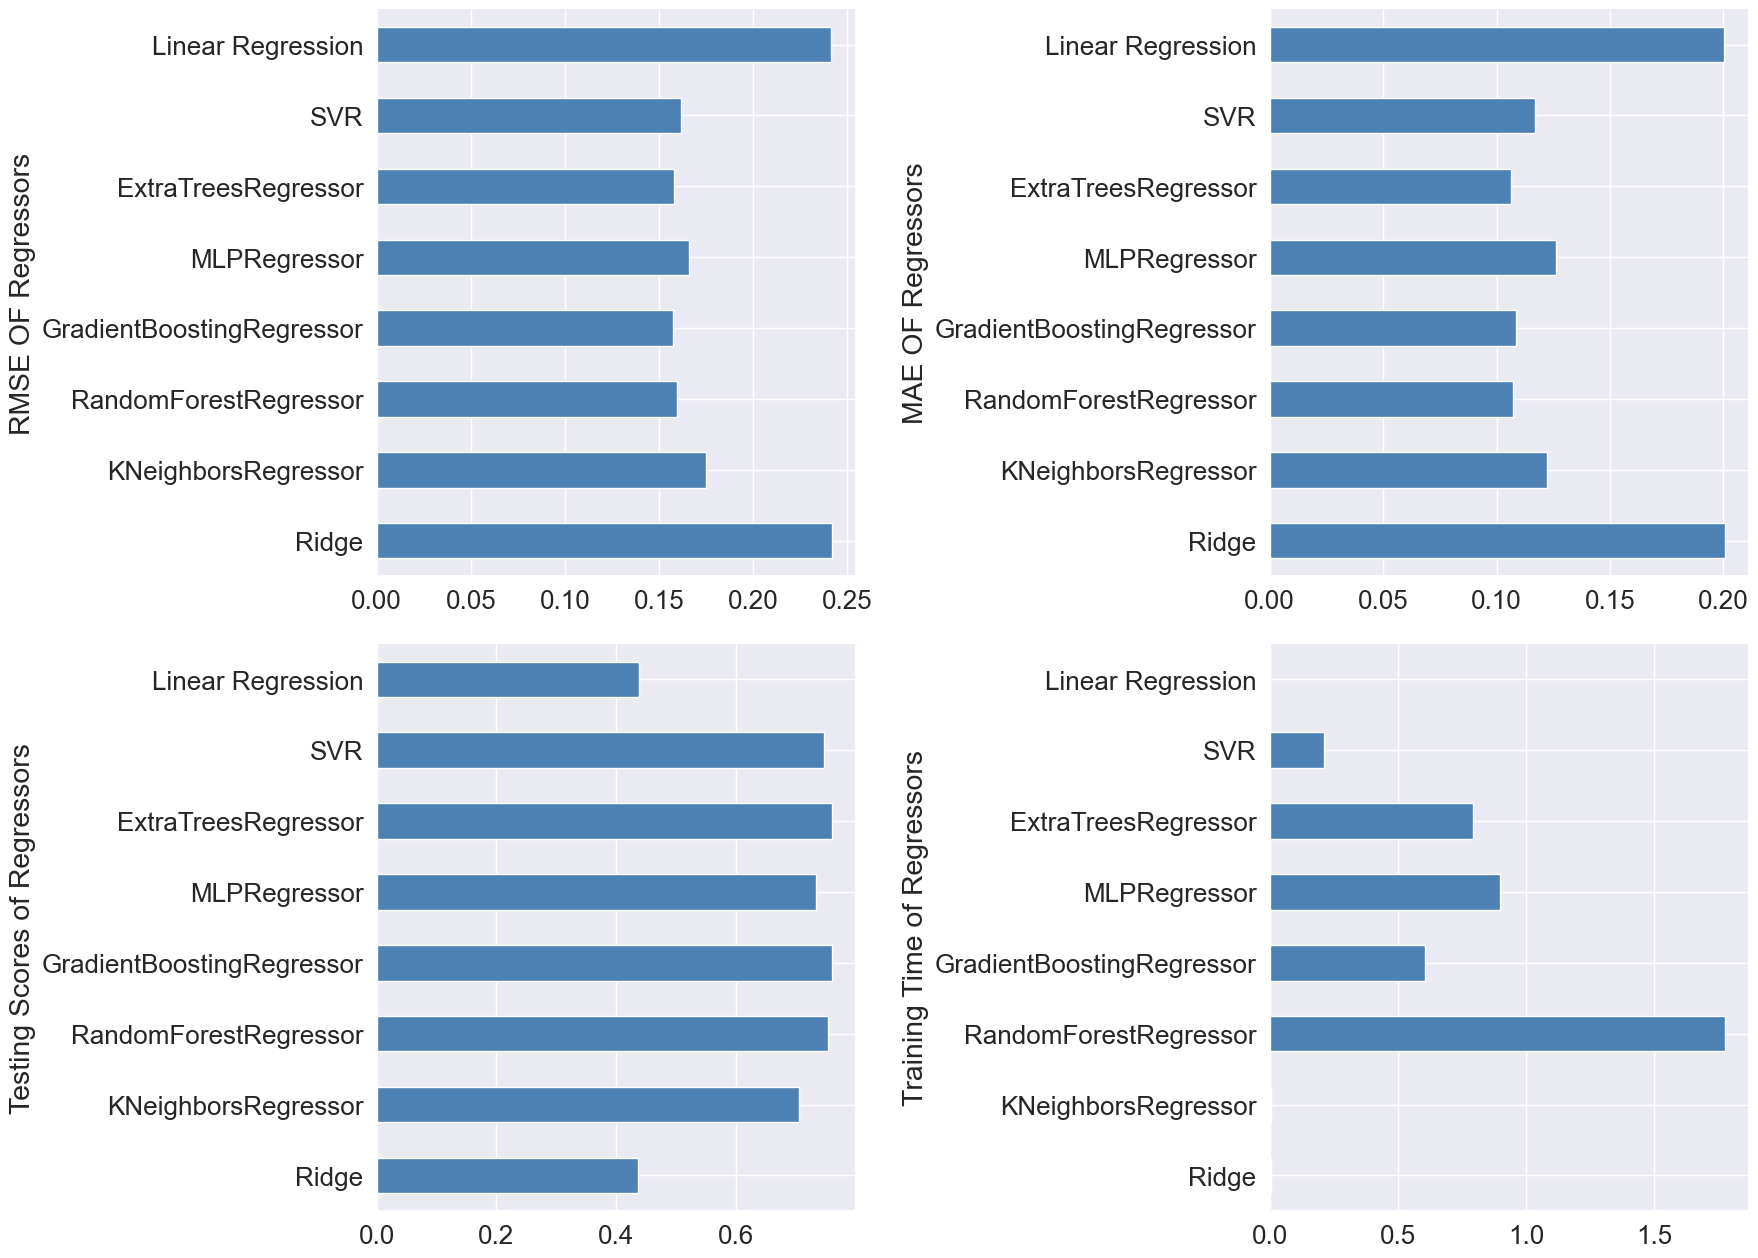

In [114]:
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties2["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties2["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("Testing Scores of Regressors")
properties2["Testing Scores"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties2["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.savefig('files_ML/S2.png')
plt.show()

# **Регрессия (PCA)**

In [115]:
benchmark_model3 = LinearRegression() 

start = time()
benchmark_model3.fit(X_train3, y_train3)
end = time()
y_pred3=benchmark_model3.predict(X_test3)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model3.score(X_train3, y_train3) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model3.score(X_test3, y_test3) * 100))

print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test3 - y_pred3)**2))))
mae = mean_absolute_error(y_test3, y_pred3)
print('MAE: %f' % mae)

Classifier fitted in 0.00 seconds
Score on Training data : 24.26%
Score on Testing data : 16.02%
RMSE : 0.296
MAE: 0.240482


In [116]:
# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
        SVR
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train3, y_train3, X_test3, y_test3)
        props.append(properites)
        
    return props

In [117]:
properties3 = get_properties()

properties3 = pd.concat(
    [properties3,
    pd.Series(
    {
        "Name": "Linear Regression",
        "RMSE": np.sqrt(mean_squared_error(y_test3, benchmark_model3.predict(X_test3))),
        "MAE": mean_absolute_error(y_test3, benchmark_model3.predict(X_test3)),
        "Training Scores": benchmark_model3.score(X_train3, y_train3),
        "Testing Scores" :benchmark_model3.score(X_test3, y_test3),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties3


,Training Times,Training Scores,Testing Scores,RMSE,MAE
Ridge,0.0032,0.2426,0.1599,0.2959,0.2405
KNeighborsRegressor,0.0011,0.8786,-0.0628,0.3328,0.2432
RandomForestRegressor,2.1842,0.9741,0.3185,0.2665,0.2110
GradientBoostingRegressor,0.9078,0.7369,0.2426,0.2809,0.2231
MLPRegressor,0.5619,0.8204,-3.2483,0.6654,0.5482
ExtraTreesRegressor,0.7455,1.0000,0.4572,0.2379,0.1950
SVR,0.2293,0.8517,-3.9507,0.7183,0.5531
Linear Regression,0.0015,0.2426,0.1602,0.2958,0.2405


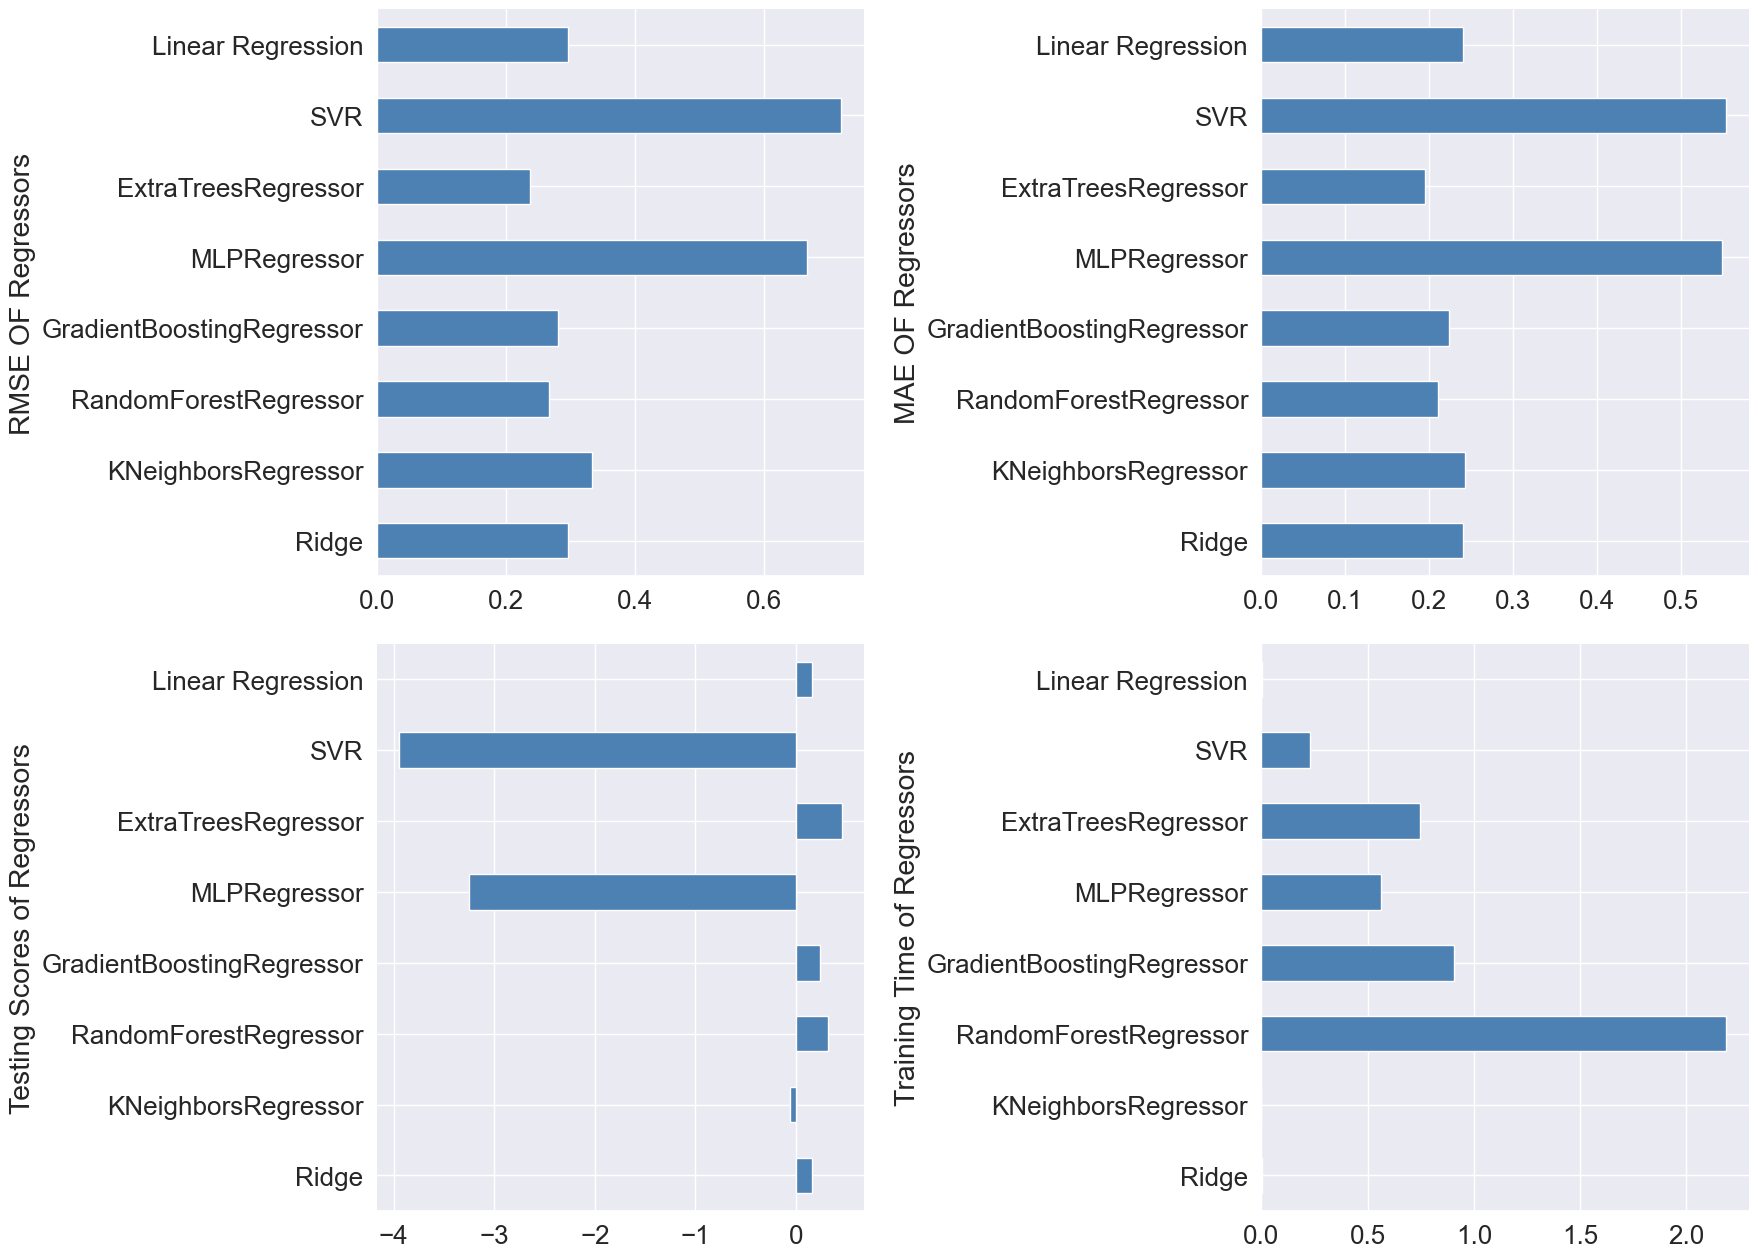

In [118]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties3["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties3["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("Testing Scores of Regressors")
properties3["Testing Scores"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties3["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.savefig('files_ML/S3.png')
plt.show()

# **Важность оценочных данных**

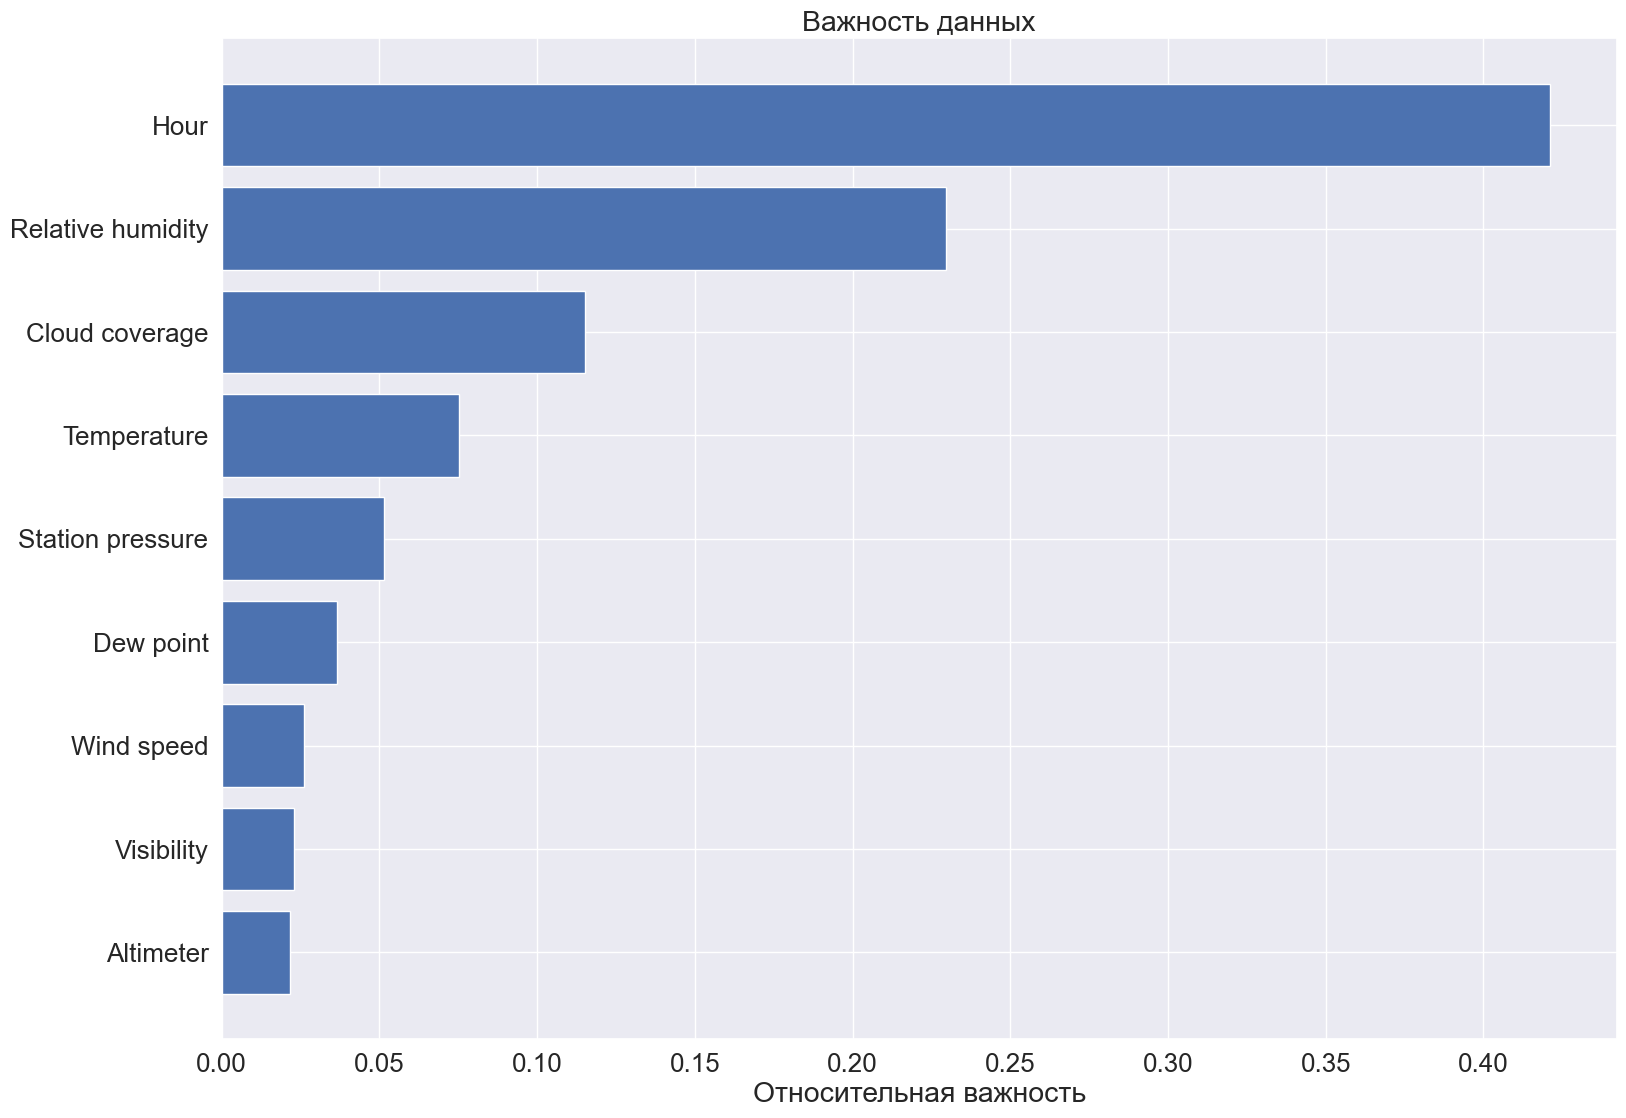

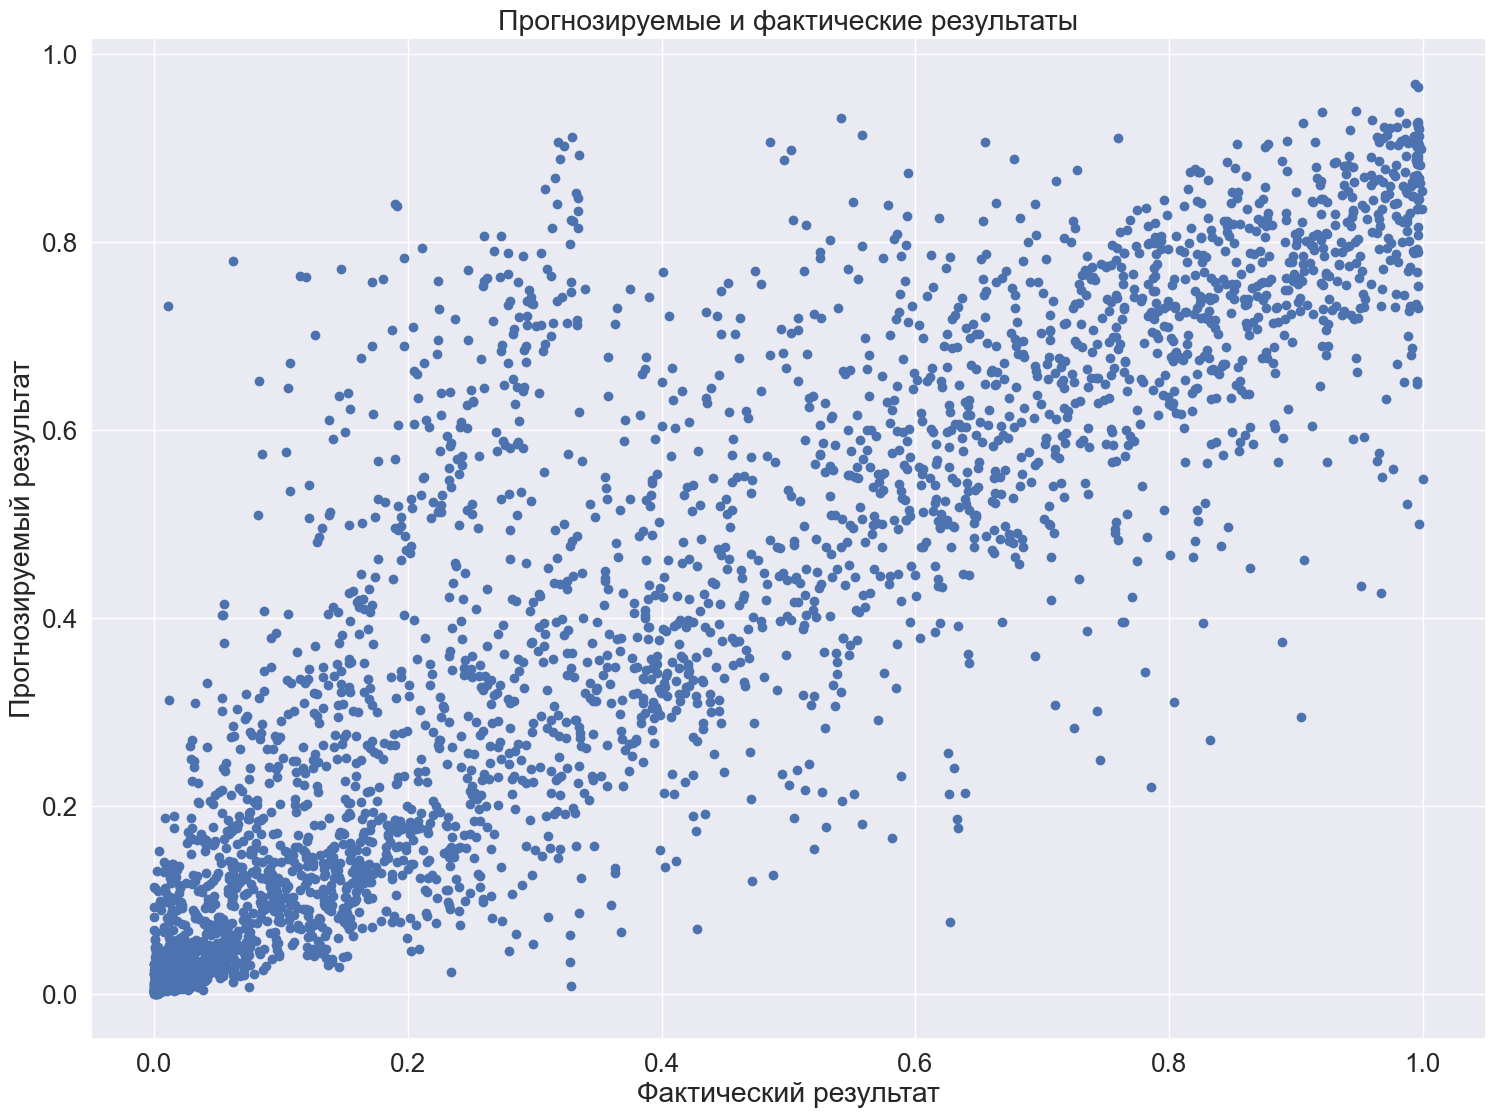

In [119]:
from sklearn.ensemble import ExtraTreesRegressor

names = X_train2.columns.values
extra_tree = ExtraTreesRegressor()

extra_tree.fit(X_train2, y_train2)

extratree_score = extra_tree.score(X_test2, y_test2)

extratree_pred = extra_tree.predict(X_test2)

features = X_train2.columns.values
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,13))
plt.title('Важность данных')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.savefig('files_ML/Относительная_важность.png')
plt.show()

plt.figure(figsize=(18,13))
plt.scatter(y_test1, extratree_pred)
plt.xlabel('Фактический результат')
plt.ylabel('Прогнозируемый результат')
plt.title('Прогнозируемые и фактические результаты')
plt.savefig('files_ML/Прогнозируемые_и_фактические_данные.png')
plt.show()


In [120]:
# Удалим несвязанные данные
norm_df1 = np.array(norm_df) 
X_s3 = norm_df1[:, (0, 1, 3, 4, 5, 6, 7, 10, 11)]
y_s3 = y_s1

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_s3, y_s3, test_size=0.30, random_state=0)

In [121]:
extra_tree = ExtraTreesRegressor(random_state=137777)

extra_tree.fit(X_train4, y_train4)

extratree_score = extra_tree.score(X_test4, y_test4)
print(extratree_score)

extratree_pred = extra_tree.predict(X_test4)

print("Среднеквадратичное отклонение: %.6f"
      % sqrt(mean_squared_error(y_test4, extratree_pred)))

print("Среднее абсолютное отклонение: %.6f"
      % mean_absolute_error(y_test4, extratree_pred))

0.999999859558018
Среднеквадратичное отклонение: 0.000117
Среднее абсолютное отклонение: 0.000065
